In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [ ]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                      cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)


In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# --------------------------------------------------------------------------------------------------------
## K-Means Clustering for Beginners 
'An in-depth explanation and step-by-step guide to this interesting and useful Machine Learning algorithm in Python, by a student'  [Link for the code](https://towardsdatascience.com/k-means-clustering-for-beginners-ea2256154109)

ï»¿Countries, BirthRate(Per1000), LifeExpectancy
(2008)Afghanistan, 46.613, 47.532
(2008)Albania, 14.69, 76.492
(2008)Algeria, 20.804, 72.44
(2008)Angola, 42.908, 49.879
(2008)Argentina, 17.372, 75.387
(2008)Armenia, 15.222, 73.794
(2008)Aruba, 11.846, 74.811
(2008)Australia, 12.741, 81.567
(2008)Austria, 9.138, 80.51
(2008)Azerbaijan, 19, 70.15
(2008)Bahamas, 16.863, 74.848
(2008)Bahrain, 18.151, 74.675
(2008)Bangladesh, 21.589, 68.007
(2008)Barbados, 11.237, 76.343
(2008)Belarus, 9.97, 69.194
(2008)Belgium, 11.293, 79.777
(2008)Belize, 24.916, 75.388
(2008)Benin, 39.599, 54.86
(2008)Bhutan, 21.522, 66.066
(2008)Bolivia, 27.349, 65.701
(2008)Bosnia and Herzegovina, 9.168, 75.221
(2008)Botswana, 24.676, 52.812
(2008)Brazil, 16.405, 72.464
(2008)Brunei, 20.061, 77.6
(2008)Bulgaria, 9.558, 73.317
(2008)Burkina Faso, 47.819, 54.065
(2008)Burundi, 34.581, 49.054
(2008)Cambodia, 24.89, 61.736
(2008)Cameroon, 37.113, 50.194
(2008)Canada, 10.625, 80.743
(2008)Cape Verde, 24.261, 73.587
(2008)

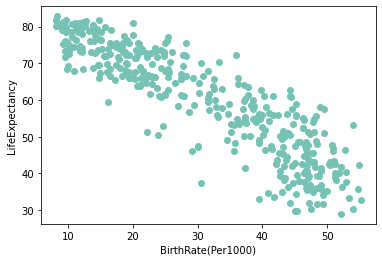

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import csv
from sklearn.metrics import pairwise_distances_argmin
from collections import Counter, defaultdict

def read_csv():
    x = []
    y = []
    countries = []
    x_label = ""
    y_label = ""
    with open('C:/Users/WarMachine/Desktop/AI/dataBoth.csv') as csvfile:
        reader = csv.reader(csvfile, delimiter = ',')
        lines = 0
        for row in reader:
            if lines >= 1:
                print(', '.join(row))
                x.append(float(row[1]))
                y.append(float(row[2]))
                countries.append(row[0])
                lines += 1
            else:
                x_label = row[1]
                y_label = row[2]
                print(', '.join(row))
                lines += 1
    return x, y, x_label, y_label, countries

x, y, x_label, y_label, countries = read_csv()
X = np.vstack((x, y)).T

plt.xlabel(x_label)
plt.ylabel(y_label)
plt.scatter(x, y, color = '#76c2b4')
plt.show()


Converging centres:
[[39.11111111 59.48594444]
 [32.78325    70.171     ]
 [29.43025    55.84685   ]
 [21.19344118 64.92185294]
 [39.90865517 54.64713793]
 [26.49908333 71.66816667]
 [24.81469231 67.55715385]
 [17.87815789 77.02042105]
 [48.68788889 33.76281481]
 [22.07866667 73.08527778]
 [41.75959459 43.66244649]
 [33.10769231 64.17830769]
 [49.62702941 42.34547059]
 [11.63647887 76.30980282]
 [17.799      71.85446667]
 [46.57107143 50.73139286]]

[[39.77772222 60.10616667]
 [32.78325    70.171     ]
 [29.42036842 55.40826316]
 [21.20854839 64.89125806]
 [38.8497931  53.81958621]
 [26.6086     72.1758    ]
 [25.35773333 67.08853333]
 [17.42825    76.9026    ]
 [47.74551515 34.1929697 ]
 [22.36142105 73.58305263]
 [41.27547826 43.70924   ]
 [32.64728571 63.66114286]
 [49.16525714 42.10162857]
 [10.92266667 77.58380702]
 [16.38306667 70.7406    ]
 [46.48368571 51.43345714]]

[[40.22105    59.79      ]
 [32.78325    70.171     ]
 [29.25042857 53.82371429]
 [21.27716129 65.09232258]
 [3

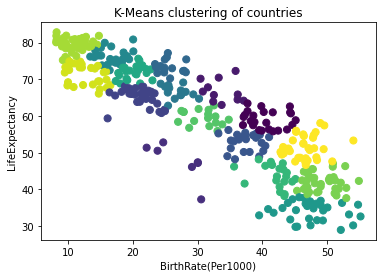

In [4]:
def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    # The main loop
    # This loop continues until convergence. 
    # You could make it run a set number of times by changing
    # it to say while x > 5, for example, and removing the break
    print('\nConverging centres:')
    while True:
        # 2a. Assign labels based on closest center
        # I am using the pairwise_distance_argmin method to 
        # calculate distances between points to centers
        labels = pairwise_distances_argmin(X, centers)

        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
        
        # Print converging centers
        print(centers)
        print()
        
    return centers, labels

clust_num = 16

center, labels = find_clusters(X, clust_num)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.title('K-Means clustering of countries')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.show()

# ----------------------------------------------------------------------------------------------------

Medicine, Weight, pH-Index
A, 1, 1
B, 2, 1
C, 4, 3
D, 5, 4
[1.0, 2.0, 4.0, 5.0] [1.0, 1.0, 3.0, 4.0]
[[1. 1.]
 [2. 1.]
 [4. 3.]
 [5. 4.]] X


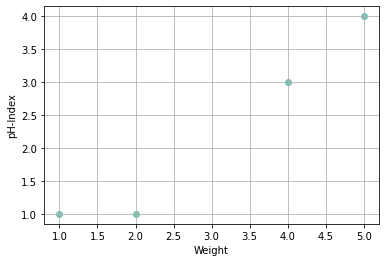


Converging centres:
lablel and center [0 0 0 1] [[4. 3.]
 [5. 4.]] int64
[[2.33333333 1.66666667]
 [5.         4.        ]]

lablel and center [0 0 1 1] [[2.33333333 1.66666667]
 [5.         4.        ]] int64
[[1.5 1. ]
 [4.5 3.5]]

lablel and center [0 0 1 1] [[1.5 1. ]
 [4.5 3.5]] int64


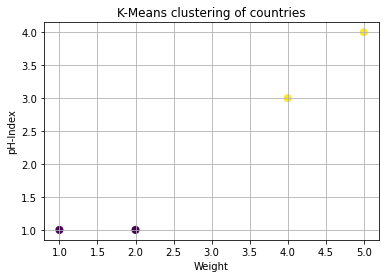

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import csv
from sklearn.metrics import pairwise_distances_argmin
from collections import Counter, defaultdict

def read_csv():
    x = []
    y = []
    countries = []
    x_label = ""
    y_label = ""
    with open('C:/Users/WarMachine/Desktop/AI/Medicine.csv') as csvfile:
        reader = csv.reader(csvfile, delimiter = ',')
        lines = 0
        for row in reader:
            if lines >= 1:
                print(', '.join(row))
                x.append(float(row[1]))
                y.append(float(row[2]))
                countries.append(row[0])
                lines += 1
            else:
                x_label = row[1]
                y_label = row[2]
                print(', '.join(row))
                lines += 1
    return x, y, x_label, y_label, countries

x, y, x_label, y_label, countries = read_csv()
X = np.vstack((x, y)).T
print(X,'X')

plt.xlabel(x_label)
plt.ylabel(y_label)
plt.scatter(x, y, color = '#76c2b4')
plt.grid()
plt.show()

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    # The main loop
    # This loop continues until convergence. 
    # You could make it run a set number of times by changing
    # it to say while x > 5, for example, and removing the break
    print('\nConverging centres:')
    while True:
        # 2a. Assign labels based on closest center
        # I am using the pairwise_distance_argmin method to 
        # calculate distances between points to centers
        labels = pairwise_distances_argmin(X, centers, metric='manhattan')
        print('lablel and center',labels,centers,labels.dtype)

        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
        
        # Print converging centers
        print(centers)
        print()
        
    return centers, labels

clust_num = 2

center, labels = find_clusters(X, clust_num)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.title('K-Means clustering of countries')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.grid()
plt.show()

___

uint8


(427, 640, 3)

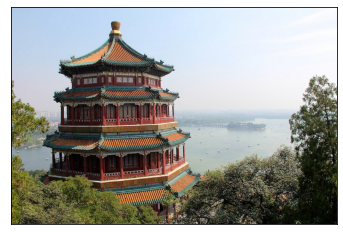

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);
print(china.dtype)
china.shape

In [8]:
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

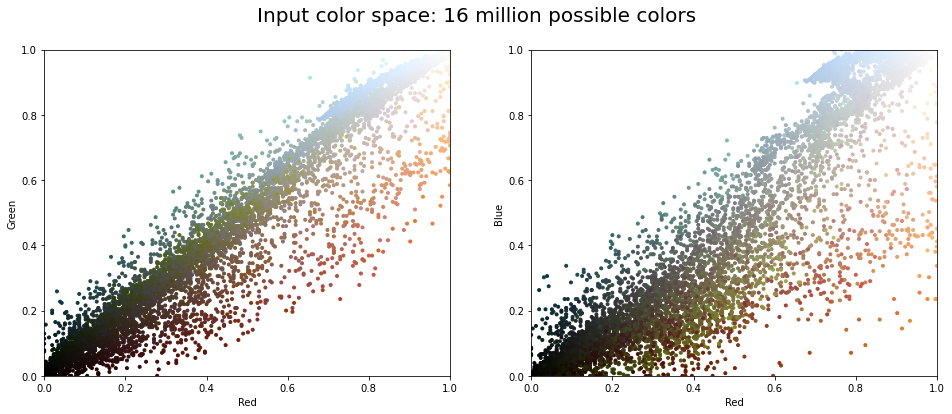

In [9]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))
    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
    fig.suptitle(title, size=20);
    
plot_pixels(data, title='Input color space: 16 million possible colors')


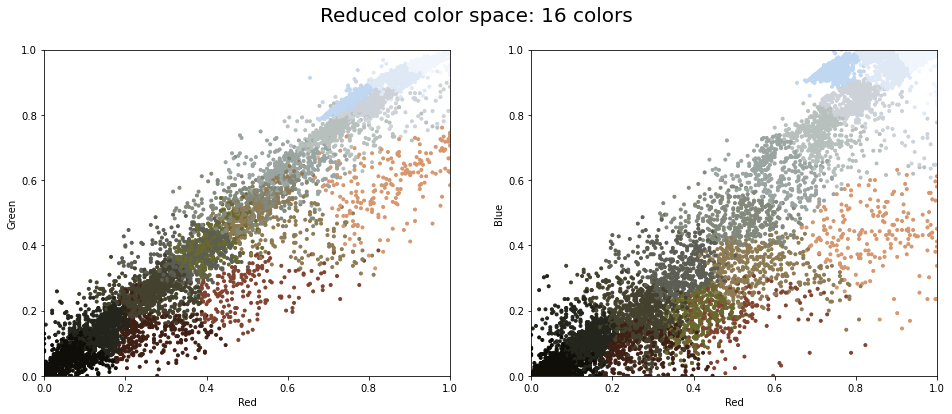

In [19]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters = 16, batch_size=2048)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
plot_pixels(data, colors=new_colors,
title="Reduced color space: 16 colors")

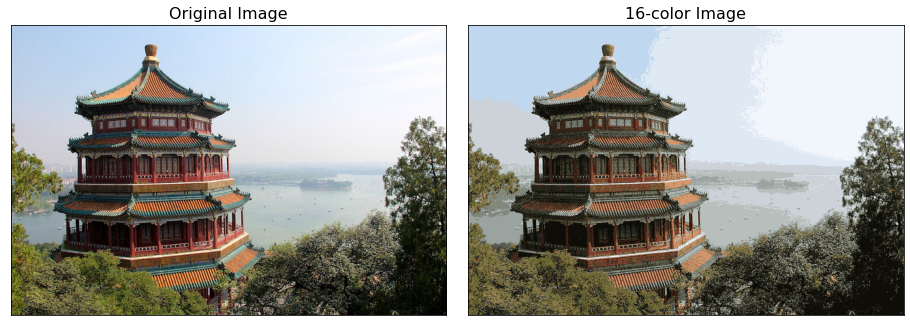

In [22]:
china_recolored = new_colors.reshape(china.shape)
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
 subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

---

In [25]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [26]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

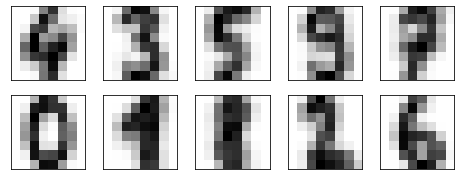

In [27]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)
    

In [28]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)


0.7935447968836951

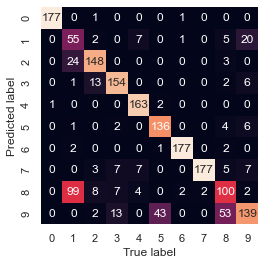

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set() 
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=digits.target_names,
           yticklabels=digits.target_names)
plt.xlabel('True label')
plt.ylabel('Predicted label');